<a href="https://colab.research.google.com/github/SakshiDangi/A-to-Z-Resources-for-Study/blob/master/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
if 'creditcardfraud' not in os.listdir():
  #install opendatasets library so that we can download dataset from kaggle
  !pip install opendatasets
  import opendatasets as od
  #download dataset
  od.download('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshi0121
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 159MB/s]


In [4]:
#load the dataset from creditcardfraud directory
data=pd.read_csv('creditcardfraud/creditcard.csv')

In [5]:
#print top 5 rows from dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#print concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#print concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#descriptive summary of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
#check for null values
data.isnull().sum().sum()

0

In [11]:
#check for duplicate records in dataset
print('duplicate records : ',data[data.duplicated()].shape[0])
data[data.duplicated()]['Class'].value_counts() #duplicate records classwise:

duplicate records :  1081


Class
0    1062
1      19
Name: count, dtype: int64

we can see that there are 1081 duplicate records present, out of them 1062 belong to non fraud transaction and 19 belong to fraud transaction.

In [13]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [14]:
#delete time column is it not useful in analysis
data.drop('Time',axis=1,inplace=True)

EDA


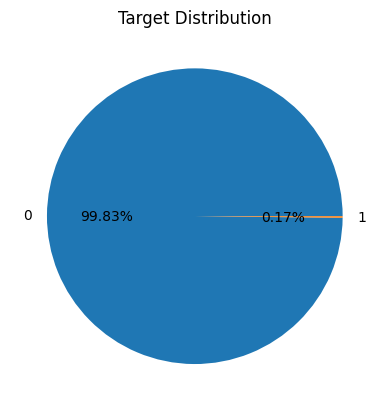

In [15]:
plt.pie(x=data['Class'].value_counts(),labels=data['Class'].value_counts().index,autopct='%.2f%%')
plt.title('Target Distribution')
plt.show()

our dataset is highly imbalanced. 99.83 % of records

---

belong to non fraud class and only 0.17 % records belong to fraud class

Since all the features in this Dataset are Principal Components of the original data I don't want to start the analysis with all the columns as we don't even know what features are they principal components of. I will start by selecting a subset of features with the help of mutual_info_classif() from sklearn library.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
feature_selector=SelectKBest(mutual_info_classif)
feature_selected = feature_selector.fit_transform(data.drop(columns='Class'), data['Class'])
features = feature_selector.get_feature_names_out()

since our dataset is imbalance we have two options to balance it either to UnderSample or OverSample. i would like to do go with undersampling here. again its your choice based on your personal preference and analysis you can select anyone.

In [17]:
#under sampling
data=data.sample(frac=1,random_state=42)

minority_class=data[data['Class']==1]
mijority_class=data[data['Class']==0].sample(minority_class.shape[0])

new_df=pd.concat([minority_class,mijority_class],axis=0)
df=new_df.sample(frac=1,random_state=42)

In [18]:
x=df[features]
y=df['Class']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

Model 1 : Logistic Regression with under sampled dataset



In [20]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='lbfgs')
lr_model.fit(x_train,y_train)
print('training score : ',lr_model.score(x_train,y_train))

training score :  0.9444444444444444


In [22]:
#function to measure the performance of the model
def model_performance(y_pred):
  print('accuracy score : ',accuracy_score(y_test,y_pred))
  print('precision score : ',precision_score(y_test,y_pred))
  print('recall score : ',recall_score(y_test,y_pred))
  print("f1 score : ",f1_score(y_test,y_pred))
  print('classification report : ','-'*30)
  print(classification_report(y_test,y_pred))

  # Assuming you have calculated the predicted probabilities or scores
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))

  # Plot the diagonal line representing a random classifier
  plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')

  # Set labels and title
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')

  # Set axis limits
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

  # Add a grid
  plt.grid(True)

  # Add legend
  plt.legend(loc="lower right")

  # Show the plot
  plt.show()

accuracy score :  0.9157894736842105
precision score :  0.989010989010989
recall score :  0.8571428571428571
f1 score :  0.9183673469387754
classification report :  ------------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        85
           1       0.99      0.86      0.92       105

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190



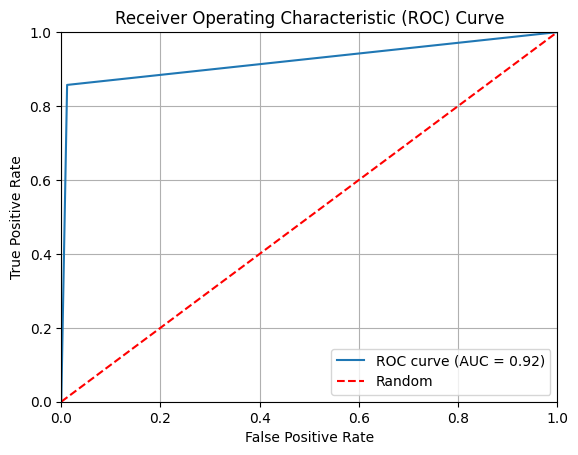

In [23]:
#make prediction
y_pred=lr_model.predict(x_test)
model_performance(y_pred)

Model 2: Decision Tree Classifier with under sampled dataset

In [24]:
max_depth=[2,4,6,8,10]
min_samples_split=[2,4,6,8,10]
min_samples_leaf=[1,2,3,4]
criterion=['gini','entropy']
params={"max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "criterion":criterion}
search_cv=RandomizedSearchCV(estimator=DecisionTreeClassifier(splitter='best',class_weight='balanced'),param_distributions=params,cv=5,scoring='recall')
search_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10]},
                   scoring='recall')

In [25]:
print('best params : ',search_cv.best_params_)
cart=search_cv.best_estimator_

best params :  {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}


accuracy score :  0.8789473684210526
precision score :  0.8867924528301887
recall score :  0.8952380952380953
f1 score :  0.8909952606635072
classification report :  ------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        85
           1       0.89      0.90      0.89       105

    accuracy                           0.88       190
   macro avg       0.88      0.88      0.88       190
weighted avg       0.88      0.88      0.88       190



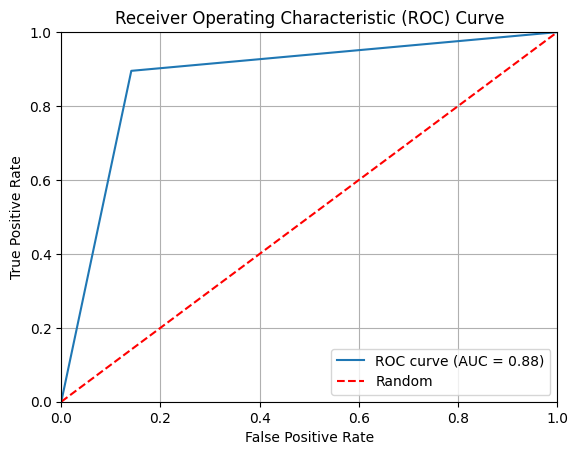

In [26]:
#make prediction
y_pred=cart.predict(x_test)
model_performance(y_pred)